<a href="https://colab.research.google.com/github/ChristianaMH/ChristianaMH/blob/main/Course_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Course Project: Comparing Multiple Models for Most Accurate Regression**

by Christiana Hellenbrand U#29955524

###Step 1: Problem Definition

In this problem, three regression models, Linear Regression, Decision Tree Regressor, and Random Forest Tree Regressor, will be used to evaluate which model is best for predicting the continuous value of a given data point. 

The chosen dataset is the california housing file that includes information, such as the longitude/latitude, median housing age, total rooms, total bedrooms, population, households, median income, and median house value.

The target data point in this case is the median house value.

The relevant features of this dataset include the house median age, total rooms, total bedrooms, households, and median income.

This project will determine which of the three models will be the most accurate for predicting the continuity of the median house value and what methods can be used to improve the results of this analysis. 

###Step 2: Data Cleaning & Preprocessing

In this step, the california_housing.csv file will be saved as a dataframe and cleaned by removing any irrelevant data and filling missing values with a default integer. 

This will also allow us to see all the necessary information pertaining to this file. 

The relevant columns for this analysis include the house median age, total rooms, total bedrooms, households, and median income, also known as our features.

Data will be cleaned through preprocessing function created below. 

In [ ]:
import pandas as pd

cali_df = pd.read_csv('california_housing.csv') #Reads the california_housing.csv file and saves it as 'cali_df'
cali_df.head() #returns first five rows of 'cali_df' dataframe

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
cali_df.info() #reports the neccessary information about the dataset

#relevant data includes: house median age, total rooms, total bedrooms, househoulds, median income, and median house value
#all relevant columns are of the correct data type: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20000 non-null  int64  
 1   longitude           20000 non-null  float64
 2   latitude            20000 non-null  float64
 3   housing_median_age  20000 non-null  float64
 4   total_rooms         20000 non-null  float64
 5   total_bedrooms      20000 non-null  float64
 6   population          20000 non-null  float64
 7   households          20000 non-null  float64
 8   median_income       20000 non-null  float64
 9   median_house_value  20000 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.5 MB


In [ ]:
#function used for data cleaning and preprocessing:

def data_preprocessing(ds): 

  #Removes all irrelevant columns
  df2 = ds.drop(labels = ['Unnamed: 0','longitude','latitude','population'], axis = 1)

  #Checks for missing values
  for col in df2.columns:
    df2[col] = df2[col].fillna(0) #replaces missing values with zero

  #Checks if there are any rows that have missing entries for all columns and removes such rows from the given dataset
  df2 = df2.dropna(axis = 0, how = 'all') 

  return df2 #returns dataframe

#Calls function here annd saves as 'cleaned_cali_df'
cleaned_cali_df = data_preprocessing(cali_df)

#Reports results
cleaned_cali_df.head()

,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value
0,27.0,3885.0,661.0,606.0,6.6085,344700.0
1,43.0,1510.0,310.0,277.0,3.5990,176500.0
2,27.0,3589.0,507.0,495.0,5.7934,270500.0
3,28.0,67.0,15.0,11.0,6.1359,330000.0
4,19.0,1241.0,244.0,237.0,2.9375,81700.0


In [ ]:
cleaned_cali_df.info() #reports information of new dataframe after cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20000 non-null  float64
 1   total_rooms         20000 non-null  float64
 2   total_bedrooms      20000 non-null  float64
 3   households          20000 non-null  float64
 4   median_income       20000 non-null  float64
 5   median_house_value  20000 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


In [ ]:
#creates list of the features for this problem:

features_names = cleaned_cali_df.columns.to_list() #converts columns into list of features
features_names.remove('median_house_value') #removes the response variable, 'median_house_value'

features_names #reports list of features
#this will be used in step 7

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'households',
 'median_income']

###Step 4: Data Scaling using Standardization

In this step, the data will be transformed in order to fit within the standardization scale. Standardization changes the dataset by subtracting each data from the mean value and dividing each by the standard deviation, also known as z-score.

This is useful for verifying that the features do not contain significant outliers within the dataset that could change the results of this analysis. 

Note: Step three was skipped because there was no need to extract/add extra features.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #creates an instance
data_standardized = scaler.fit_transform(cleaned_cali_df) #transforms data to fit within scale
df_standardized = pd.DataFrame(data_standardized, columns = cleaned_cali_df.columns.to_list()) #creates new dataframe with standardized data
df_standardized.head() #reports first five rows

,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value
0,-0.129372,0.573437,0.292445,0.278934,1.439960,1.190933
1,1.142294,-0.517885,-0.542037,-0.582955,-0.143730,-0.264661
2,-0.129372,0.437424,-0.073681,-0.011855,1.011029,0.548810
3,-0.049893,-1.180949,-1.243381,-1.279801,1.191263,1.063720
4,-0.765205,-0.641491,-0.698948,-0.687744,-0.491832,-1.085056


###Step 5: Data Splitting

In this step, the dataset is separated into two dataframes: one for the response variable and one for the features. These dataframes are then split into train and test parts.

The response variable (Y) is the target data, also known as the median house value, while the remaining columns, or the features, are the predictors (X).

In [ ]:
#splitting the data:

#creates dataframe called 'Y' that includes only the column 'median_house_value' (the response variable)
Y = pd.DataFrame(df_standardized['median_house_value'])

#creates dataframe called 'X' that includes the remaining columns (the features columns)
X = df_standardized.drop(labels = ['median_house_value'], axis = 1)

#Prepares X_train, X_test, Y_train, and Y_test dataframes:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

###Step 6: Model Selection, Model Fitting and Model Evaluation

In this step, each of the three models will be used to transform the test data in order to create predictions. These predictions, along with the test data, will be used to calculate the accuracy metrics for each model.

The results from each model fitting will determine which has the best performance for the regression problem by evaluating which model contains the least error.

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_list = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()] #creates list with the three models
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest'] #creates list with each model name
mae_list = [] #empty list for mean absolute errors
mse_list = [] #empty list for mean squared errors
mape_list = [] #empty list for mean absolute percentage errors

#for loop that calculates the accuracy metrics for each model:
for model in range(len(model_list)):
  regressor = model_list[model] #creates instance
  regressor.fit(X_train, Y_train) #transforms the train data to fit the model
  predictions = regressor.predict(X_test) #creates predictions for model

  #produces metrics for the model: 
  mae_list.append(metrics.mean_absolute_error(Y_test, predictions)) #adds error to mae_list
  mse_list.append(metrics.mean_squared_error(Y_test, predictions)) #adds error to mse_list
  mape_list.append(metrics.mean_absolute_percentage_error(Y_test, predictions)) #adds error to mape_list

#creates dictionary with results for the accuracy metrics
results_dict = {'Model name': model_names, 
                'Mean Absolute Error':mae_list,
                'Mean Squared Error':mse_list,
                'Mean Absolute Percentage Error':mape_list}

results_df = pd.DataFrame(results_dict) #creates dataframe will results
results_df #reports results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


,Model name,Mean Absolute Error,Mean Squared Error,Mean Absolute Percentage Error
0,Linear Regression,0.493893,0.445941,1.510533
1,Decision Tree,0.622914,0.747737,2.836204
2,Random Forest,0.450614,0.381761,1.909742


Model Evaluation: Random Forest Regressor has the best performance for this regression problem because it produces the least error within the accuracy metrics. The Decision Tree Regressor has the worst performance because it produces the highest error compared to the other two models.

###Step 7: Report Feature Importance

In this step, the results of each model's feature importance is reported as a graph and as a dataframe summary.

Model 1: Linear Regression Graph

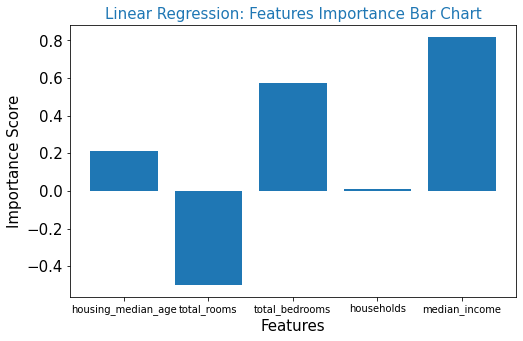

In [ ]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy as np

#define the model
model1 = LinearRegression()

#fit the model
model1.fit(X_train, Y_train)

#get importance/predictions
predictions_list = np.concatenate(model1.coef_) #converts to one dimensional array 
predictions_list = predictions_list.tolist() #converts to list

#plots feature importance:
pyplot.figure(figsize = (8,5))
pyplot.bar([x for x in features_names], predictions_list)

#titles
pyplot.title('Linear Regression: Features Importance Bar Chart', fontsize = 15, color = 'Tab:blue')
pyplot.xlabel("Features", fontsize = 15)
pyplot.ylabel('Importance Score', fontsize = 15)

pyplot.xticks(fontsize = 10)
pyplot.yticks(fontsize = 15)

#returns graph
pyplot.show()

Model 1: Linear Regression Results

In [ ]:
summary1 = pd.DataFrame({'LR Features': features_names , 'Scores': predictions_list}) #extracts features and coefficients and organizes as a dataframe
summary1 #reports dataframe with estimated parameters of the fit model

,LR Features,Scores
0,housing_median_age,0.210519
1,total_rooms,-0.496925
2,total_bedrooms,0.572813
3,households,0.011514
4,median_income,0.816062


Model 2: Decision Tree Regressor Graph

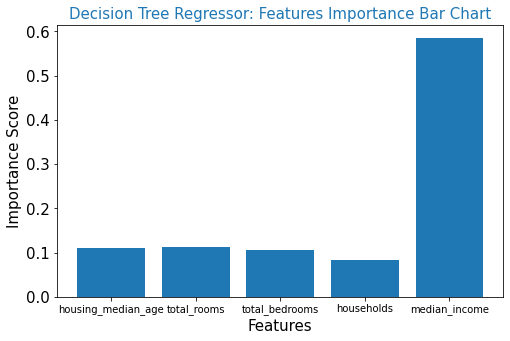

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

#define the model
model2 = DecisionTreeRegressor()

#fit the model
model2.fit(X_train, Y_train)

#get importance
importance = model2.feature_importances_

#plot feature importance
pyplot.figure(figsize = (8,5))
pyplot.bar([x for x in model2.feature_names_in_], importance)

#titles
pyplot.title('Decision Tree Regressor: Features Importance Bar Chart', fontsize = 15, color = 'Tab:blue')
pyplot.xlabel("Features", fontsize = 15)
pyplot.ylabel('Importance Score', fontsize = 15)

pyplot.xticks(fontsize = 10)
pyplot.yticks(fontsize = 15)

#returns graph
pyplot.show()

Model 2: Decision Tree Regressor Results

In [ ]:
summary2 = pd.DataFrame({'DTR Features': features_names , 'Scores': importance}) #extracts features and coefficients and organizes as a dataframe
summary2 #reports dataframe with estimated parameters of the fit model

,DTR Features,Scores
0,housing_median_age,0.110723
1,total_rooms,0.112989
2,total_bedrooms,0.107015
3,households,0.084052
4,median_income,0.585222


Model 3: Random Forest Regressor Graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


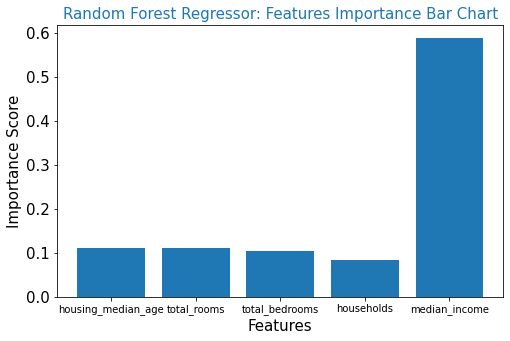

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

#define the model
model3 =  RandomForestRegressor()

#fit the model
model3.fit(X_train, Y_train)

#get importance
importance2 = model3.feature_importances_

#plot feature importance
pyplot.figure(figsize = (8,5))
pyplot.bar([x for x in model3.feature_names_in_], importance2)

#titles
pyplot.title('Random Forest Regressor: Features Importance Bar Chart', fontsize = 15, color = 'Tab:blue')
pyplot.xlabel("Features", fontsize = 15)
pyplot.ylabel('Importance Score', fontsize = 15)

pyplot.xticks(fontsize = 10)
pyplot.yticks(fontsize = 15)

#returns graph
pyplot.show()

Model 3: Random Forest Regressor Results

In [ ]:
summary3 = pd.DataFrame({'RFR Features': features_names , 'Scores': importance2}) #extracts features and coefficients and organizes as a dataframe
summary3 #reports dataframe with estimated parameters of the fit model

,RFR Features,Scores
0,housing_median_age,0.112001
1,total_rooms,0.111629
2,total_bedrooms,0.104210
3,households,0.084520
4,median_income,0.587640


###Step 8: Improving Results

To improve the results of this experiment, the Random Forest Regressor can be tested against other regression models to ensure it is the best model for this problem.

Another method would be to repeat this analysis by using the preprocessing function in step two to eliminate the household feature due its small significance for all three models. This would improve the accuracy metrics and feature importance results for the models.

Furthermore, eliminating the total rooms feature would be useful when comparing the accuracy metrics for the Linear Regression model because this was the only feature that contained a negative significance compared to the other features. 

###Step 9: Final Remarks

In this analysis, three models, Linear Regression, Decision Tree Regressor, and Random Tree Regressor, were used to address a specific regression problem. This problem required predicting the continuous value of the 'median_house_value' data within the california housing dataset. All three models were compared through the accuracy metrics to prove which model had the best performance.


The target data point in this analysis was the median house value.


The relevant features of this dataset included the house median age, total rooms, total bedrooms, househoulds, and median income.


The results of this analysis proved the Random Forest Regressor to be the best model for this problem because it contained the least error in the accuracy metrics, while the Decision Tree Regressor had the most. 

When looking at the feature importance graphs for each model, the household feature contains the least significance, while median income contains the most. The only outlier is found in the Linear Regression graph where the total rooms feature has a negative significance compared to the other features. 

For future analysis, this project could be tested again while eliminating both the household feature and total rooms feature to prove if the Random Forest Regressor is still the best model for this problem. Another recommendation would be to test the Random Forest Regressor against other regression models to ensure it has the most accurate performance.